In [52]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression

# 1.1

In [53]:
datafile=open('Q1_data/data.pkl','rb')
data=pickle.load(datafile)
data.shape

(5000, 2)

In [54]:
x, y = data[:, :-1], data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
x_folds = np.array_split(x_train,10)
y_folds = np.array_split(y_train,10)
print([i.shape for i in x_folds])
print([i.shape for i in y_folds])
y_test.shape

[(450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1)]
[(450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,), (450,)]


(500,)

In [55]:
for i in range(0,10):
    y_folds[i] = y_folds[i].reshape(450,1)
print([i.shape for i in y_folds])
x_test = x_test.reshape(500,1)
y_test = y_test.reshape(500,1)
test=np.concatenate((x_test,y_test),axis=1)
test.shape

[(450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1), (450, 1)]


(500, 2)

In [56]:
for i in range(0,10):
  x_folds[i]=np.concatenate((x_folds[i],y_folds[i]),axis=1)

In [57]:
train_dataset=x_folds

In [58]:
print([i.shape for i in train_dataset])

[(450, 2), (450, 2), (450, 2), (450, 2), (450, 2), (450, 2), (450, 2), (450, 2), (450, 2), (450, 2)]


# 1.2

In [59]:
def poly(x,d):
    data=x
    if d==1:
        return data
    else:
        for i in range(2,d+1):
            x_p=x**i
            data=np.concatenate((data,x_p),axis=1)
        return data

**use sklearn’s linear_model.LinearRegression().fit() for finding the appropriate coefficients with the default parameters**

In [60]:
# creating a function to fit the data 10 times with different models
def trainingOnAllSplits(data,degree):
    models=[]
    for split in data:
        if degree ==1:
            x=split[:,0].reshape(-1,1)
            y=split[:,-1].reshape(-1,1)
        else:
            x=np.delete(split,-1,axis=1)
            x=poly(x,degree)
            y=split[:,-1].reshape(-1,1)
        model=linear_model.LinearRegression().fit(x,y)
        models.append(model)       
    return models

In [61]:
models=trainingOnAllSplits(train_dataset,1)
x_test=test[:,0].reshape(-1,1)
yTrue=test[:,1].reshape(-1,1)
df=pd.DataFrame(yTrue,columns=['test'])
counter=1
for model in models:
    yhat=model.predict(x_test)
    name='model_'+str(counter)
    df[name]=yhat
    counter+=1

**Calculating & Tabulate the values of 
bias and variance**

In [62]:
df['Estimated']=np.mean(df.iloc[:,1:].values,axis=1)
print(df.shape)
df.head()

(500, 12)


,test,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,Estimated
0,7.085300,-2.671056,-3.009976,-3.252570,-2.629040,-2.637434,-2.683579,-2.532229,-2.239590,-2.940683,-2.780778,-2.737693
1,-20.898346,-11.902124,-12.558410,-12.485227,-11.804195,-11.784016,-12.317402,-12.300312,-11.136981,-12.978470,-12.239633,-12.150677
2,-6.981142,-7.510108,-8.015396,-8.092455,-7.438781,-7.432198,-7.733760,-7.652792,-6.903724,-8.202628,-7.739239,-7.672108
3,-4.125424,-6.058392,-6.513770,-6.640490,-5.995859,-5.993769,-6.218706,-6.116623,-5.504483,-6.624044,-6.251701,-6.191784
4,7.733223,-2.537406,-2.871731,-3.118897,-2.496199,-2.505008,-2.544098,-2.390804,-2.110771,-2.795353,-2.643830,-2.601410


In [63]:
df['Bias']=(df['Estimated']-df['test'])**2
df.head()

,test,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,Estimated,Bias
0,7.085300,-2.671056,-3.009976,-3.252570,-2.629040,-2.637434,-2.683579,-2.532229,-2.239590,-2.940683,-2.780778,-2.737693,96.491209
1,-20.898346,-11.902124,-12.558410,-12.485227,-11.804195,-11.784016,-12.317402,-12.300312,-11.136981,-12.978470,-12.239633,-12.150677,76.521722
2,-6.981142,-7.510108,-8.015396,-8.092455,-7.438781,-7.432198,-7.733760,-7.652792,-6.903724,-8.202628,-7.739239,-7.672108,0.477434
3,-4.125424,-6.058392,-6.513770,-6.640490,-5.995859,-5.993769,-6.218706,-6.116623,-5.504483,-6.624044,-6.251701,-6.191784,4.269844
4,7.733223,-2.537406,-2.871731,-3.118897,-2.496199,-2.505008,-2.544098,-2.390804,-2.110771,-2.795353,-2.643830,-2.601410,106.804635


In [64]:
bias=(df['Bias'].mean())**(0.5)
print('The bias of the model :',bias)
variance=((df.iloc[:,1:-2].values-df['Estimated'].values.reshape(500,1))**2).sum()/df.iloc[:,1:-2].size
print('The variance of the model :',variance)

The bias of the model : 5.513059535722157
The variance of the model : 0.11781878190889884


**Detailed report explaining how bias 
and variance changes as function classes varies**

In [65]:
def experiment(datasets,test,degree):
    models=trainingOnAllSplits(datasets,degree)
    if degree==1:
        x_test=np.delete(test,-1,axis=1).reshape(-1,1)
    else:
        x_test=poly(np.delete(test,-1,axis=1).reshape(-1,1),degree)
    yTrue=test[:,1].reshape(-1,1)
    df=pd.DataFrame(yTrue,columns=['test'])
    
    
    counter=1
    for model in models:
        yhat=model.predict(x_test)
        name='model_'+str(counter)
        df[name]=yhat
        counter+=1
    df['Estimated']=np.mean(df.iloc[:,1:].values,axis=1)
    df['Bias']=(df['Estimated']-df['test'])**2
    bias=(df['Bias'].mean())**(0.5)
    variance=((df.iloc[:,1:-2].values-df['Estimated'].values.reshape(500,1))**2).sum()/df.iloc[:,1:-2].size
    mse=np.mean((yhat-yTrue)**2)
    return bias,variance,mse

In [66]:
biases=[]
variances=[]
mses=[]
for i in range(1,10):
    bias,variance,mse=experiment(train_dataset,test,i)
    biases.append(bias)
    variances.append(variance)

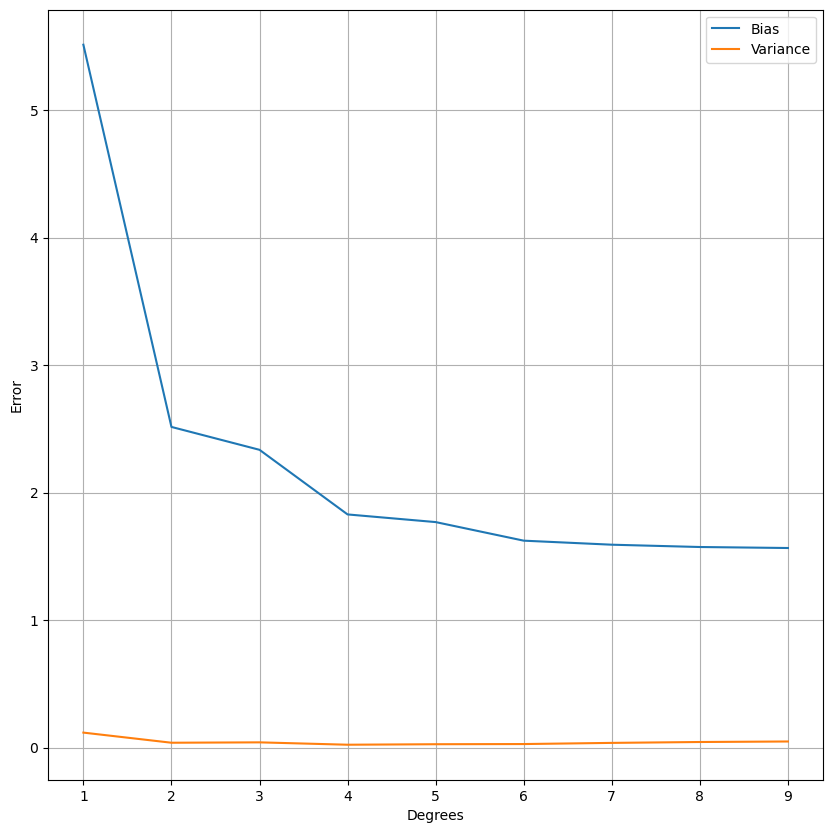

In [67]:
degrees=list(range(1,10))
plt.figure(figsize=(10,10))
plt.plot(degrees,biases)
plt.plot(degrees,variances)
plt.xlabel('Degrees')
plt.ylabel('Error')
plt.legend(['Bias','Variance'])
plt.grid();

# Report
**the bias keep decreasing as model complexity increase but it still relatively high so i think we can keep increasing the model complexity becasue the the variance still low and bias still high which mean it still underfit**

# 2

In [68]:
datafile1=open('Q2_data/X_train.pkl','rb')
datafile2=open('Q2_data/Y_train.pkl','rb')
datafile3=open('Q2_data/X_test.pkl','rb')
datafile4=open('Q2_data/Fx_test.pkl','rb')
x_train=pickle.load(datafile1)
y_train=pickle.load(datafile2)
x_test=pickle.load(datafile3)
y_test=pickle.load(datafile4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 400)
(20, 400)
(80,)
(80,)


In [69]:
x_train = x_train.T
y_train = y_train.T
print(x_train.shape)
print(y_train.shape)

(400, 20)
(400, 20)


In [70]:
x_subsets = np.array_split(x_train,20,axis=1)
y_subsets = np.array_split(y_train,20,axis=1)
print([i.shape for i in x_subsets])
print([i.shape for i in y_subsets])

for i in range(0,20):
  x_subsets[i]=np.concatenate((x_subsets[i],y_subsets[i]),axis=1)
print([i.shape for i in x_subsets])

[(400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1)]
[(400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1), (400, 1)]
[(400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2), (400, 2)]


In [71]:
x_test = x_test.reshape(80,1)
y_test = y_test.reshape(80,1)
test_subset=np.concatenate((x_test,y_test),axis=1)
test_subset.shape

(80, 2)

In [72]:
models=trainingOnAllSplits(x_subsets,1)
x_test=test[:,0].reshape(-1,1)
yTrue=test[:,1].reshape(-1,1)
df=pd.DataFrame(yTrue,columns=['test'])
counter=1
for model in models:
    yhat=model.predict(x_test)
    name='model_'+str(counter)
    df[name]=yhat
    counter+=1

In [73]:
df['Estimated']=np.mean(df.iloc[:,1:].values,axis=1)
df['Bias']=(df['Estimated']-df['test'])**2
bias=(df['Bias'].mean())**(0.5)
print('The bias of the model :',bias)
variance=((df.iloc[:,1:-2].values-df['Estimated'].values.reshape(500,1))**2).sum()/df.iloc[:,1:-2].size
print('The variance of the model :',variance)
print(df.shape)
df.head()

The bias of the model : 198.51595854418647
The variance of the model : 26845.860419552595
(500, 23)


,test,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_20,Estimated,Bias
0,7.085300,502.744902,-71.922541,-28.679559,226.815873,268.961564,430.269903,29.686545,167.314831,73.114473,...,-7.164879,52.212331,24.114786,239.535344,213.266926,373.738691,204.880506,109.849833,179.241798,29637.859705
1,-20.898346,634.656203,84.109606,144.569105,386.928713,427.027467,584.944527,177.572199,305.342856,210.404501,...,152.827202,207.112369,164.249379,400.716847,372.425292,503.798554,355.077127,239.820995,328.133023,121822.897149
2,-6.981142,571.894611,9.871645,62.139761,310.749214,351.821873,511.352457,107.210228,239.671010,145.083784,...,76.705158,133.413050,97.575257,324.028893,296.699919,441.917850,283.615629,177.982494,257.292615,69840.618734
3,-4.125424,551.149698,-14.666611,34.893965,285.569211,326.963780,487.027691,83.953123,217.964156,123.492991,...,51.544147,109.052834,75.537115,298.680828,271.670021,421.464102,259.995092,157.542696,233.877370,56645.329886
4,7.733223,500.835053,-74.181618,-31.187902,224.497714,266.673041,428.030480,27.545415,165.316423,71.126749,...,-9.481289,49.969644,22.085878,237.201713,210.962586,371.855648,202.705917,107.968074,177.086109,28680.399918


In [74]:
def experiment2(datasets,test,degree):
    models=trainingOnAllSplits(datasets,degree)
    if degree==1:
        x_test=np.delete(test,-1,axis=1).reshape(-1,1)
    else:
        x_test=poly(np.delete(test,-1,axis=1).reshape(-1,1),degree)
    yTrue=test[:,1].reshape(-1,1)
    df=pd.DataFrame(yTrue,columns=['test'])
    
    
    counter=1
    for model in models:
        yhat=model.predict(x_test)
        name='model_'+str(counter)
        df[name]=yhat
        counter+=1
    df['Estimated']=np.mean(df.iloc[:,1:].values,axis=1)
    df['Bias']=(df['Estimated']-df['test'])**2
    bias=(df['Bias'].mean())**(0.5)
    variance=((df.iloc[:,1:-2].values-df['Estimated'].values.reshape(80,1))**2).sum()/df.iloc[:,1:-2].size
    mse=np.mean((yhat-yTrue)**2)
    return bias,variance,mse

In [75]:
biases=[]
variances=[]
mses=[]
for i in range(1,10):
    bias,variance,mse=experiment2(x_subsets,test_subset,i)
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)


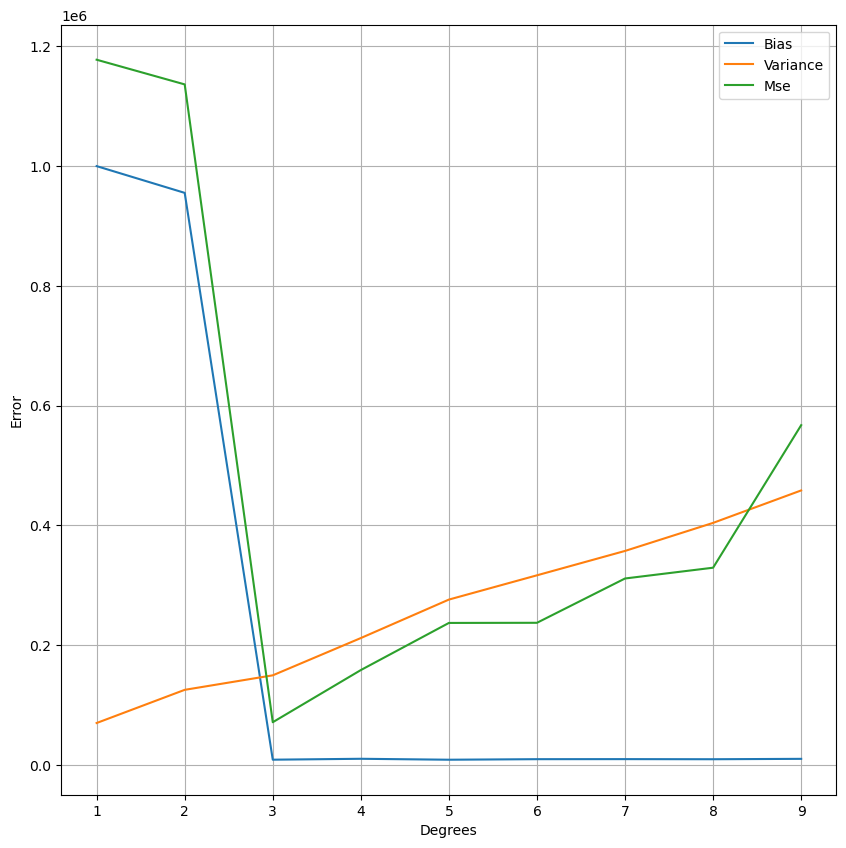

In [76]:
degrees=list(range(1,10))
plt.figure(figsize=(10,10))
plt.plot(degrees,np.square(biases))
plt.plot(degrees,variances)
plt.plot(degrees,mses)
plt.xlabel('Degrees')
plt.ylabel('Error')
plt.legend(['Bias','Variance','Mse'])
plt.grid();

# Report
**From bias-variance plot**


* when the degree is less than three there is **low variance and high bias** which mean it **underfit**
* when the degree is more than three there is **high variance and low bias** which mean it **overfit**
*  **we can use bias-variance trade off to decide that the right degree for our model is when degree=3**




** **